In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
df=pd.read_csv("./dataset/HDFC.csv",index_col='Date',parse_dates=True)

In [3]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


In [4]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [5]:
numerical_data=df.select_dtypes(include=['float64','int64']).columns

In [6]:
categorical_data=df.select_dtypes(include=['object']).columns

In [7]:
df['Date']=df.index

In [8]:
start_date='2011-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

rate of return is defined as the closing value subtracted from the previos close value divided by previous close value multiplied by 100

Return=[(Close-Prev Close)/Prev Close]x100

In [9]:
df['return']=((df['Close']-df['Prev Close'])/df['Prev Close'])*100

In [10]:
df=df.loc[mask]

In [11]:
df=df.ffill()

In [12]:
df['return'].isnull().values.any()

False

In [13]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Date,return
Date,,,,,,,,,,,,,,,,
2011-01-03,HDFC,EQ,728.35,737.90,737.90,724.00,727.10,728.20,728.93,768310,5.600437e+13,NaN,413255.0,0.5379,2011-01-03,-0.020594
2011-01-04,HDFC,EQ,728.20,731.00,738.80,725.30,729.90,731.75,732.15,2071437,1.516595e+14,NaN,1220345.0,0.5891,2011-01-04,0.487503
2011-01-05,HDFC,EQ,731.75,727.80,727.80,706.15,707.05,708.10,713.22,1346235,9.601606e+13,NaN,850733.0,0.6319,2011-01-05,-3.231978
2011-01-06,HDFC,EQ,708.10,713.70,714.70,700.80,705.90,706.90,707.41,1579745,1.117522e+14,NaN,958078.0,0.6065,2011-01-06,-0.169468
2011-01-07,HDFC,EQ,706.90,703.10,708.70,680.00,683.90,683.90,694.66,2377426,1.651508e+14,NaN,1553546.0,0.6535,2011-01-07,-3.253643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,HDFC,EQ,2403.05,2417.00,2464.65,2411.05,2451.85,2455.15,2441.15,2723426,6.648299e+14,90401.0,1164270.0,0.4275,2020-12-24,2.168078
2020-12-28,HDFC,EQ,2455.15,2467.00,2485.00,2436.60,2485.00,2476.45,2460.41,2085391,5.130918e+14,67694.0,889141.0,0.4264,2020-12-28,0.867564
2020-12-29,HDFC,EQ,2476.45,2480.00,2530.00,2480.00,2511.00,2518.95,2513.80,4490464,1.128813e+15,162376.0,2226857.0,0.4959,2020-12-29,1.716166


In [14]:
df=df.drop(columns=['Date','Symbol','Series'])

In [15]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-01-03,728.35,737.90,737.90,724.00,727.10,728.20,728.93,768310,5.600437e+13,NaN,413255.0,0.5379,-0.020594
2011-01-04,728.20,731.00,738.80,725.30,729.90,731.75,732.15,2071437,1.516595e+14,NaN,1220345.0,0.5891,0.487503
2011-01-05,731.75,727.80,727.80,706.15,707.05,708.10,713.22,1346235,9.601606e+13,NaN,850733.0,0.6319,-3.231978
2011-01-06,708.10,713.70,714.70,700.80,705.90,706.90,707.41,1579745,1.117522e+14,NaN,958078.0,0.6065,-0.169468
2011-01-07,706.90,703.10,708.70,680.00,683.90,683.90,694.66,2377426,1.651508e+14,NaN,1553546.0,0.6535,-3.253643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,2403.05,2417.00,2464.65,2411.05,2451.85,2455.15,2441.15,2723426,6.648299e+14,90401.0,1164270.0,0.4275,2.168078
2020-12-28,2455.15,2467.00,2485.00,2436.60,2485.00,2476.45,2460.41,2085391,5.130918e+14,67694.0,889141.0,0.4264,0.867564
2020-12-29,2476.45,2480.00,2530.00,2480.00,2511.00,2518.95,2513.80,4490464,1.128813e+15,162376.0,2226857.0,0.4959,1.716166


In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

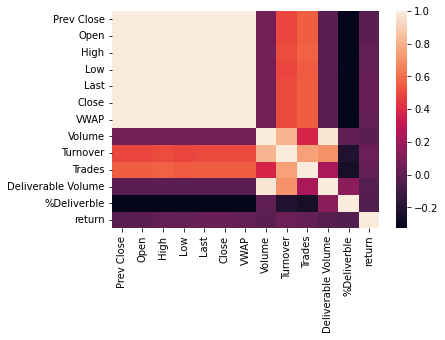

In [17]:
sn.heatmap(df.corr())

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06',
               '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10',
               '2011-06-13', '2011-06-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=2502, freq='B')

In [20]:
df=df.ffill(axis=0)
df['return'].isnull().values.any()

False

In [21]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,return
Date,,,,,,,,,,,,,
2011-06-01,684.05,676.55,692.95,676.55,689.00,689.10,688.38,1204308.0,8.290230e+13,38210.0,562346.0,0.4669,0.738250
2011-06-02,689.10,681.05,684.70,676.60,680.25,680.00,680.53,1100046.0,7.486138e+13,20300.0,637219.0,0.5793,-1.320563
2011-06-03,680.00,678.50,683.05,658.25,659.15,660.05,668.24,2170805.0,1.450628e+14,33742.0,1435985.0,0.6615,-2.933824
2011-06-06,660.05,659.95,674.10,659.15,671.00,670.65,668.56,2854529.0,1.908411e+14,38749.0,2007268.0,0.7032,1.605939
2011-06-07,670.65,668.00,674.65,662.30,667.35,669.20,669.01,1865334.0,1.247924e+14,35136.0,1207216.0,0.6472,-0.216208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2403.05,2417.00,2464.65,2411.05,2451.85,2455.15,2441.15,2723426.0,6.648299e+14,90401.0,1164270.0,0.4275,2.168078
2020-12-28,2455.15,2467.00,2485.00,2436.60,2485.00,2476.45,2460.41,2085391.0,5.130918e+14,67694.0,889141.0,0.4264,0.867564
2020-12-29,2476.45,2480.00,2530.00,2480.00,2511.00,2518.95,2513.80,4490464.0,1.128813e+15,162376.0,2226857.0,0.4959,1.716166


In [22]:
train=df.iloc[:2250,12]
test=df.iloc[2250:,12]

In [23]:
Decomp_results=seasonal_decompose(df['return'])

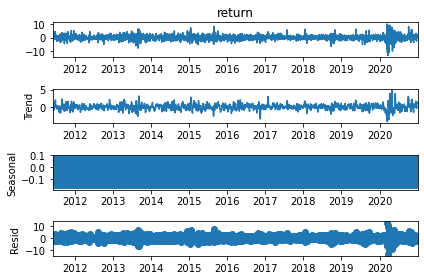

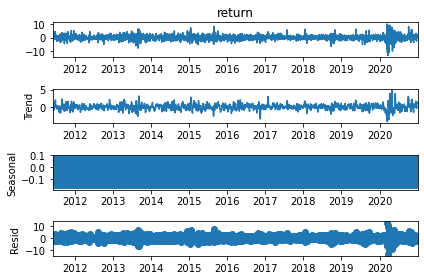

In [24]:
Decomp_results.plot()

In [25]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:2250]
exo_test=exo.iloc[2250:]


In [26]:
exo=exo.asfreq('B')

In [27]:
exo.ffill()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume
Date,,,,,,,,,,,
2011-06-01,684.05,676.55,692.95,676.55,689.00,689.10,688.38,1204308.0,8.290230e+13,38210.0,562346.0
2011-06-02,689.10,681.05,684.70,676.60,680.25,680.00,680.53,1100046.0,7.486138e+13,20300.0,637219.0
2011-06-03,680.00,678.50,683.05,658.25,659.15,660.05,668.24,2170805.0,1.450628e+14,33742.0,1435985.0
2011-06-06,660.05,659.95,674.10,659.15,671.00,670.65,668.56,2854529.0,1.908411e+14,38749.0,2007268.0
2011-06-07,670.65,668.00,674.65,662.30,667.35,669.20,669.01,1865334.0,1.247924e+14,35136.0,1207216.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,2403.05,2417.00,2464.65,2411.05,2451.85,2455.15,2441.15,2723426.0,6.648299e+14,90401.0,1164270.0
2020-12-28,2455.15,2467.00,2485.00,2436.60,2485.00,2476.45,2460.41,2085391.0,5.130918e+14,67694.0,889141.0
2020-12-29,2476.45,2480.00,2530.00,2480.00,2511.00,2518.95,2513.80,4490464.0,1.128813e+15,162376.0,2226857.0


In [28]:
exo=np.nan_to_num(exo)

In [29]:
from pmdarima import auto_arima

In [30]:
auto_arima(df['return'],exogenous=exo,m=1,trace=True,D=1).summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4617.030, Time=3.42 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4617.271, Time=1.95 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4618.131, Time=1.96 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4618.118, Time=2.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=21692.060, Time=1.58 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4617.903, Time=3.03 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4623.425, Time=2.78 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4607.916, Time=3.39 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4605.938, Time=3.12 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4603.947, Time=2.88 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4618.044, Time=2.56 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4605.906, Time=3.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4607.905, Time=4.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4601.977, Time=2.66 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4616.070, Time=2.51 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4603.939, Time=2.92 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4603.969, Time=2.84 sec


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4621.443, Time=2.75 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4605.937, Time=3.23 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 53.408 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2502
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2285.989
Date:                Sat, 04 Jun 2022   AIC                           4601.977
Time:                        01:36:42   BIC                           4689.350
Sample:                             0   HQIC                          4633.696
                               - 2502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0631   2.36e-29  -2.68e+27      0.000      -0.063      -0.063
x2            -0.0046   2.35e-29  -1.98e+26      0.000      -0.005      -0.005
x3             0.0011    2.4e-29   4.51e+25      0.000       0.001       0.001
x4            -0.0019   2.28e-29  -8.36e+25      0.000      -0.002      -0.002
x5             0.0025   2.35e-29   1.05e+26      0.000       0.002       0.002
x6             0.0567   2.35e-29   2.42e+27      0.000       0.057       0.057
x7             0.0093   2.35e-29   3.98e+26      0.000       0.009       0.009
x8         -7.793e-08   1.09e-25  -7.18e+17      0.000   -7.79e-08   -7.79e-08
x9         -2.906e-16   1.57e-17    -18.510      0.000   -3.21e-16    -2.6e-16
x10         2.048e-06   2.69e-27   7.61e+20      0.000    2.05e-06    2.05e-06
x11         9.136e-08    7.1e-26   1.29e+18      0.000    9.14e-08    9.14e-08
ar.L1          0.0186   2.58e-33    7.2e+30      0.000       0.019       0.019
ar.L2         -0.0264   5.88e-35   -4.5e+32      0.000      -0.026      -0.026
ar.L3         -0.0801   1.04e-33  -7.69e+31      0.000      -0.080      -0.080
sigma2         0.3631   5.14e-33   7.06e+31      0.000       0.363       0.363
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2947.50
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.62e+49. Standard errors may be unstable.
"""

In [31]:
import statsmodels.api as sm

In [32]:
model=sm.tsa.arima.ARIMA(train,exog=exo_train,order=(3,0,0))

Model=model.fit()

Model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 return   No. Observations:                 2250
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -1939.679
Date:                Sat, 04 Jun 2022   AIC                           3911.358
Time:                        01:36:44   BIC                           4002.857
Sample:                    06-01-2011   HQIC                          3944.755
                         - 01-14-2020                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               8.459e-05   2.35e-32    3.6e+27      0.000    8.46e-05    8.46e-05
Prev Close            -0.0730   3.43e-29  -2.12e+27      0.000      -0.073      -0.073
Open                  -0.0034   3.44e-29  -9.95e+25      0.000      -0.003      -0.003
High                   0.0068    3.5e-29   1.94e+26      0.000       0.007       0.007
Low                    0.0009   3.38e-29   2.58e+25      0.000       0.001       0.001
Last                  -0.0015   3.44e-29  -4.47e+25      0.000      -0.002      -0.002
Close                  0.0695   3.44e-29   2.02e+27      0.000       0.070       0.070
VWAP                   0.0007   3.44e-29   1.95e+25      0.000       0.001       0.001
Volume             -8.707e-08   1.33e-25  -6.57e+17      0.000   -8.71e-08   -8.71e-08
Turnover           -4.012e-16    1.8e-17    -22.273      0.000   -4.36e-16   -3.66e-16
Trades              1.707e-06    3.3e-27   5.17e+20      0.000    1.71e-06    1.71e-06
Deliverable Volume  1.106e-07   9.38e-26   1.18e+18      0.000    1.11e-07    1.11e-07
ar.L1                  0.0173   2.19e-33   7.91e+30      0.000       0.017       0.017
ar.L2                 -0.0531   2.99e-33  -1.78e+31      0.000      -0.053      -0.053
ar.L3                 -0.0835   1.91e-33  -4.36e+31      0.000      -0.083      -0.083
sigma2                 0.3276   3.37e-33   9.71e+31      0.000       0.328       0.328
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2092.97
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  2e+49. Standard errors may be unstable.
"""

In [33]:
start_len=len(train)
end_len=len(train)+len(test)-1

pred=Model.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')
print(pred)

2020-01-15   -0.506042
2020-01-16   -0.509054
2020-01-17   -1.935062
2020-01-20   -0.067873
2020-01-21    0.728099
                ...   
2020-12-25    3.640327
2020-12-28    1.319067
2020-12-29    2.868768
2020-12-30   -0.361795
2020-12-31    2.622325
Freq: B, Name: predicted_mean, Length: 252, dtype: float64


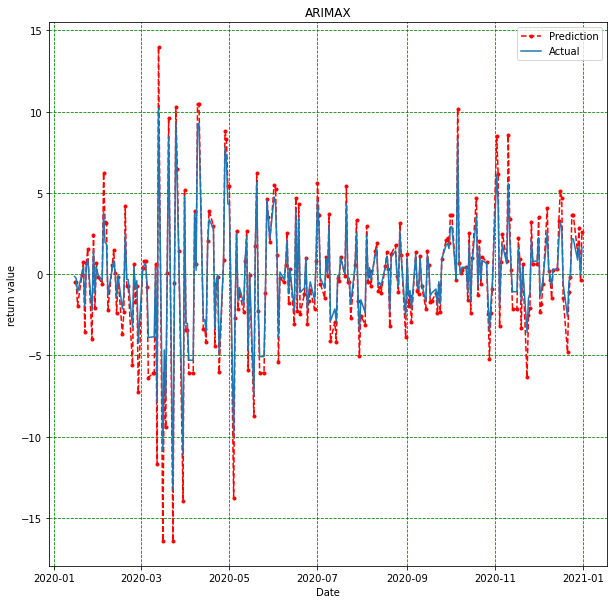

In [41]:
plt.figure(figsize=(10,10))
plt.plot(pred,label='Prediction',marker='.',linestyle='dashed',color='red')
plt.plot(pred.index,test,label='Actual')
plt.title('ARIMAX')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [35]:
import math
test=np.nan_to_num(test)
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(test,pred))
print(rmse)

1.068450023273066


In [36]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test,pred)
print(error)

0.7387152503346408


In [37]:
print('test mean')
test.mean()


test mean


0.07126597130496955

In [38]:
print('prediction mean')
pred.mean()

prediction mean


-0.09431974553742367

In [39]:
from sklearn.metrics import r2_score
r2_score(test,pred)

0.8829137911501382